In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 고용노동부_예산.xlsx   employment_budget
# 채용행사및박람회.xlsx  recruitment_events

In [42]:
data_budget=pd.read_excel('고용노동부_예산.xlsx')
data_events=pd.read_excel('채용행사및박람회.xlsx')

In [43]:
data_budget.to_csv('employment_budget.csv', encoding='utf-8-sig')
data_events.to_csv('recruitment_events.csv', encoding='utf-8-sig')

In [46]:
print(data_budget.head(3))
print(data_events.head(3))

   year     단위사업명  국회확정금액(천원)
0  2020  국민취업지원제도   277128000
1  2021  국민취업지원제도   828647000
2  2022  국민취업지원제도  1496473000
   year  채용행사  채용박람회
0  2010  6720     80
1  2011  5878    103
2  2012  4258     67


In [ ]:
print(data_budget.info())
print(data_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        19 non-null     int64 
 1   단위사업명       19 non-null     object
 2   국회확정금액(천원)  19 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 588.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    15 non-null     int64
 1   채용행사    15 non-null     int64
 2   채용박람회   15 non-null     int64
dtypes: int64(3)
memory usage: 492.0 bytes
None


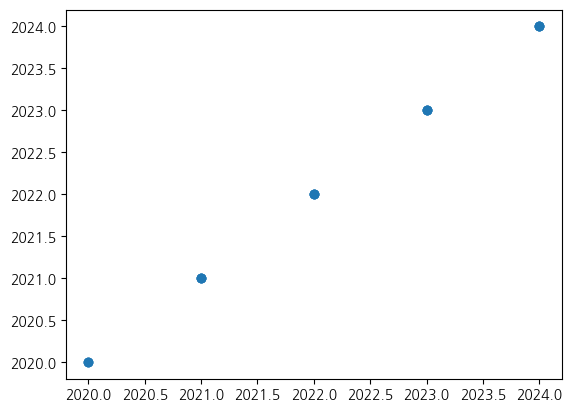

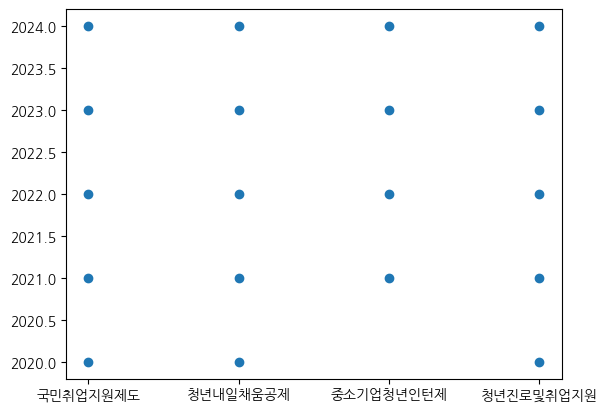

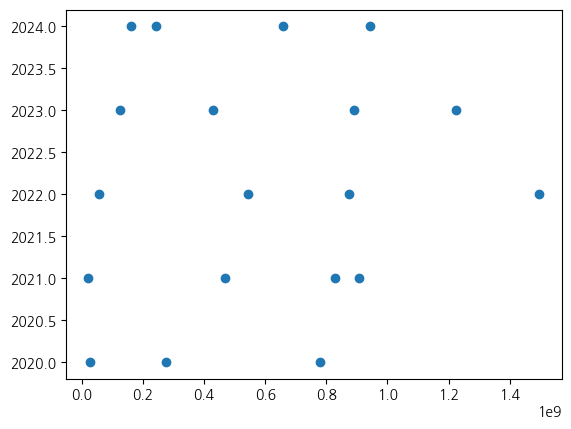

In [53]:
for col in data_budget:
    xdata=data_budget[col]
    ydata=data_budget['year']
    
    plt.plot(xdata, ydata, 'o')
    plt.show()


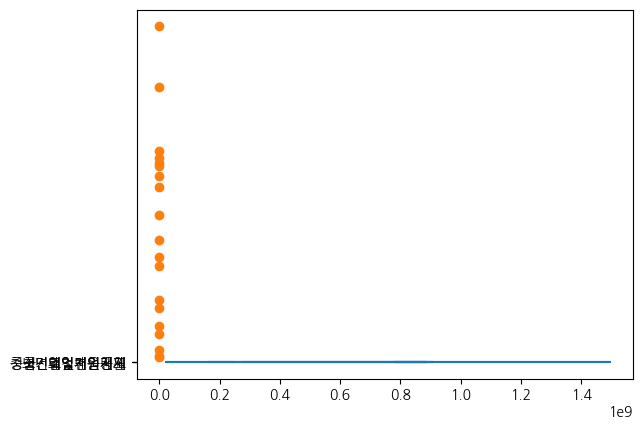

In [58]:

xdata=data_budget['국회확정금액(천원)']
ydata=data_budget['단위사업명']
zdata=data_budget['year']
    
plt.plot(xdata, ydata, xdata, 'o')
plt.show()

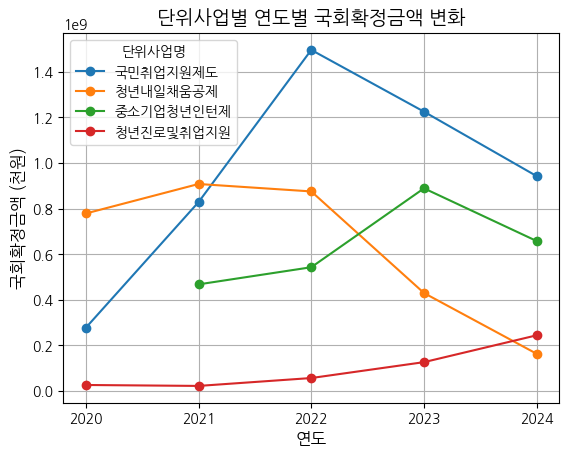

In [59]:
for 사업명 in data_budget["단위사업명"].unique():
    subset = data_budget[data_budget["단위사업명"] == 사업명]
    plt.plot(subset["year"], subset["국회확정금액(천원)"], marker='o', label=사업명, linestyle='-')

# 그래프 세부 설정
plt.xlabel("연도", fontsize=12)
plt.ylabel("국회확정금액 (천원)", fontsize=12)
plt.title("단위사업별 연도별 국회확정금액 변화", fontsize=14)
plt.legend(title="단위사업명", fontsize=10)
plt.grid(True)
plt.xticks(data_budget["year"].unique())  # X축 연도를 명확하게 표시

# 그래프 출력
plt.show()

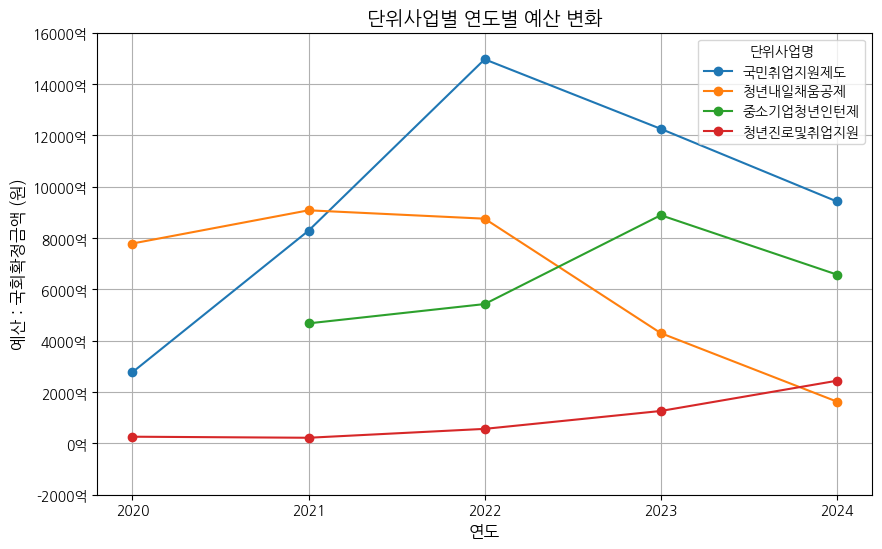

In [70]:

data_budget = pd.read_csv('employment_budget.csv')

# 억 단위 변환 함수 (천원 단위를 실제 억 원 단위로 변환)
def convert_to_real_amount(val):
    return val / 1e5  # 천원 단위를 억 원 단위로 변환 (1억 = 100,000,000원)

# 그래프 그리기
plt.figure(figsize=(10, 6))

for 사업명 in data_budget["단위사업명"].unique():
    subset = data_budget[data_budget["단위사업명"] == 사업명]
    plt.plot(subset["year"], convert_to_real_amount(subset["국회확정금액(천원)"]), marker='o', label=사업명, linestyle='-')

# 그래프 세부 설정
plt.xlabel("연도", fontsize=12)
plt.ylabel("예산 : 국회확정금액 (원)", fontsize=12)
plt.title("단위사업별 연도별 예산 변화", fontsize=14)
plt.legend(title="단위사업명", fontsize=10)
plt.grid(True)
plt.xticks(data_budget["year"].unique())

# y축 눈금 조정 (실제 억 원 단위로 표시)
plt.yticks(plt.yticks()[0], [f"{int(ytick)}억" for ytick in plt.yticks()[0]])

# 그래프 출력
plt.show()


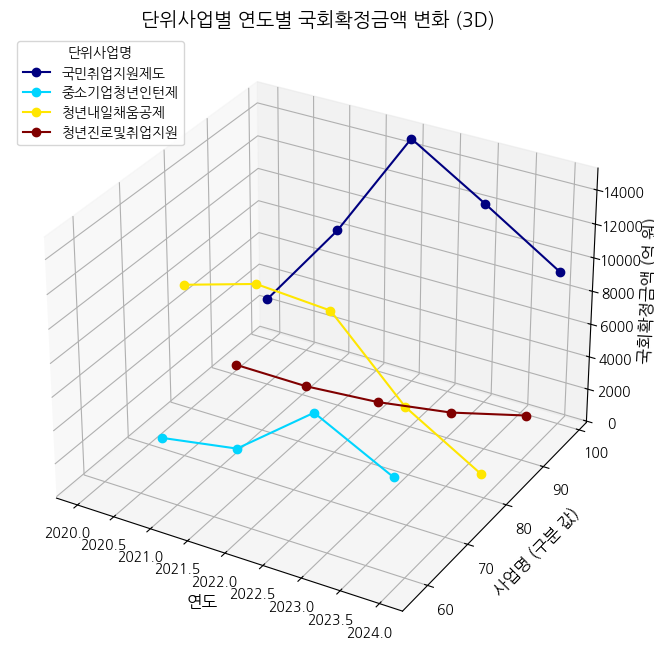

In [71]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 데이터 로드
data_budget = pd.read_csv('employment_budget.csv')

# 억 단위 변환 함수 (천원 단위를 억 원 단위로 변환)
def convert_to_real_amount(val):
    return val / 1e5  # 천원 단위를 억 원 단위로 변환 (1억 = 100,000,000원)

# 3D 그래프 생성
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 컬러맵 설정
colors = plt.cm.jet(np.linspace(0, 1, len(data_budget["단위사업명"].unique())))

# 사업명 별 데이터 플롯
for color, (사업명, subset) in zip(colors, data_budget.groupby("단위사업명")):
    ax.plot(subset["year"], np.full_like(subset["year"], hash(사업명) % 100),  # y축에 사업명 고유값 배정
            convert_to_real_amount(subset["국회확정금액(천원)"]), marker='o', linestyle='-', label=사업명, color=color)

# 축 라벨 설정
ax.set_xlabel("연도", fontsize=12)
ax.set_ylabel("사업명 (구분 값)", fontsize=12)
ax.set_zlabel("국회확정금액 (억 원)", fontsize=12)
ax.set_title("단위사업별 연도별 국회확정금액 변화 (3D)", fontsize=14)

# 범례 추가
ax.legend(title="단위사업명", fontsize=10, loc="upper left")

# 그래프 출력
plt.show()


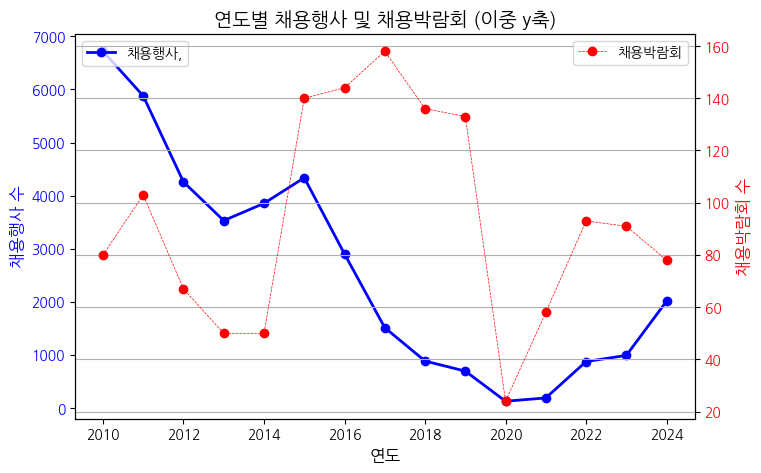

In [79]:

# 데이터 로드
data = pd.read_csv('recruitment_events.csv')

# 불필요한 열 제거
data = data.drop(columns=["Unnamed: 0"])

# 1. 이중 y축을 사용한 선 그래프 (Line Plot with Twin Axes)
fig, ax1 = plt.subplots(figsize=(8, 5))

ax2 = ax1.twinx()  # 두 번째 y축 생성

# 첫 번째 y축 (채용행사)
ax1.plot(data["year"], data["채용행사"], marker="o", linestyle="-", color="blue", label="채용행사,", linewidth=2)
ax1.set_ylabel("채용행사 수", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")

# 두 번째 y축 (채용박람회)
ax2.plot(data["year"], data["채용박람회"], marker="o", linestyle="--", color="red", label="채용박람회", linewidth=0.5)
ax2.set_ylabel("채용박람회 수", color="red", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

# 공통 설정
ax1.set_xlabel("연도", fontsize=12)
plt.title("연도별 채용행사 및 채용박람회 (이중 y축)", fontsize=14)
plt.grid(True)

# 범례 추가
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


In [73]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('recruitment_events.csv')

# 불필요한 열 제거
data = data.drop(columns=["Unnamed: 0"])

# 증감률 계산 (전년 대비 변화율)
data["채용행사_증감률"] = data["채용행사"].pct_change() * 100  # 백분율 변환
data["채용박람회_증감률"] = data["채용박람회"].pct_change() * 100  # 백분율 변환

# 결과 출력
print(data[['year', '채용행사', '채용행사_증감률', '채용박람회', '채용박람회_증감률']])


    year  채용행사    채용행사_증감률  채용박람회   채용박람회_증감률
0   2010  6720         NaN     80         NaN
1   2011  5878  -12.529762    103   28.750000
2   2012  4258  -27.560395     67  -34.951456
3   2013  3530  -17.097229     50  -25.373134
4   2014  3855    9.206799     50    0.000000
5   2015  4337   12.503243    140  180.000000
6   2016  2902  -33.087388    144    2.857143
7   2017  1513  -47.863542    158    9.722222
8   2018   885  -41.506940    136  -13.924051
9   2019   695  -21.468927    133   -2.205882
10  2020   128  -81.582734     24  -81.954887
11  2021   190   48.437500     58  141.666667
12  2022   875  360.526316     93   60.344828
13  2023   991   13.257143     91   -2.150538
14  2024  2013  103.128153     78  -14.285714


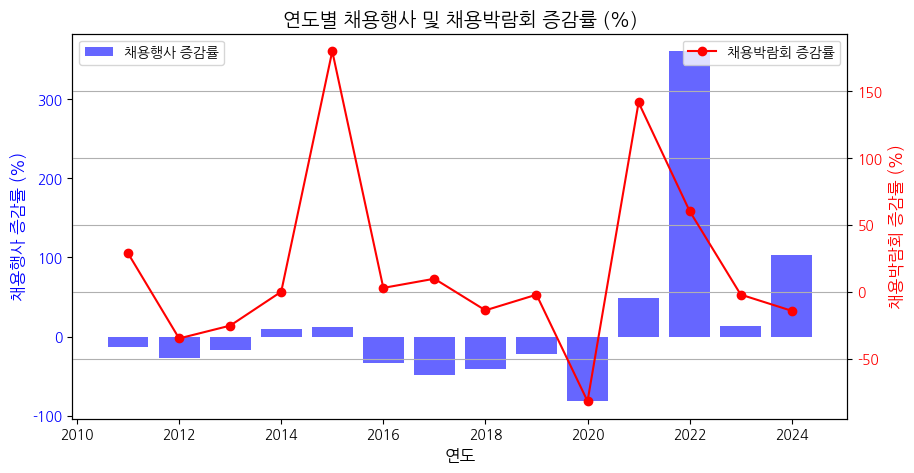

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('recruitment_events.csv')

# 불필요한 열 제거
data = data.drop(columns=["Unnamed: 0"])

# 증감률 계산
data["채용행사_증감률"] = data["채용행사"].pct_change() * 100  # 백분율 변환
data["채용박람회_증감률"] = data["채용박람회"].pct_change() * 100  # 백분율 변환

# 이중 Y축을 활용한 증감률 그래프
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()  # 두 번째 y축 생성

# 채용행사 증감률 (막대 그래프)
ax1.bar(data["year"], data["채용행사_증감률"], color="blue", alpha=0.6, label="채용행사 증감률")
ax1.set_ylabel("채용행사 증감률 (%)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")

# 채용박람회 증감률 (선 그래프)
ax2.plot(data["year"], data["채용박람회_증감률"], marker="o", linestyle="-", color="red", label="채용박람회 증감률")
ax2.set_ylabel("채용박람회 증감률 (%)", color="red", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

# 공통 설정
ax1.set_xlabel("연도", fontsize=12)
plt.title("연도별 채용행사 및 채용박람회 증감률 (%)", fontsize=14)
plt.grid(True)

# 범례 추가
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


In [80]:
data_budget_card=pd.read_excel('내일배움카드 예산.xlsx')
data_budget_card.to_csv('budget_card.csv', encoding='utf-8-sig')


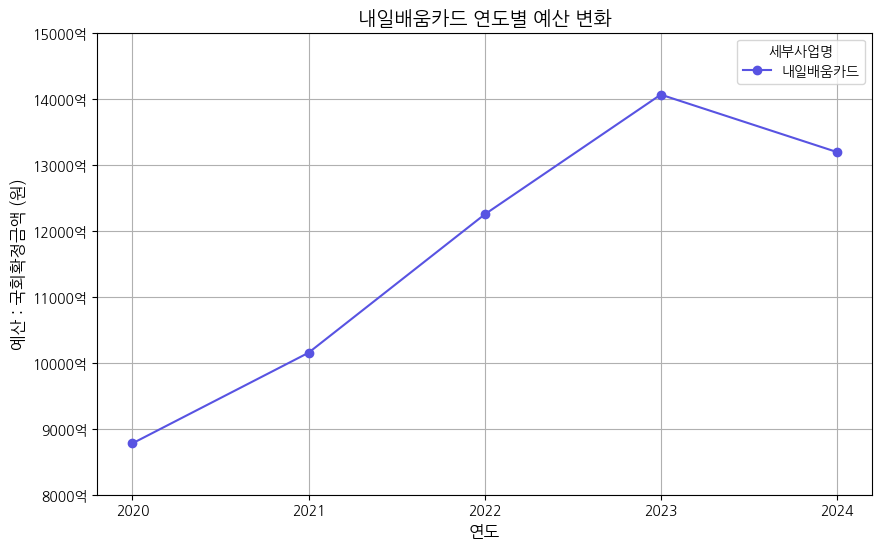

In [86]:

# 억 단위 변환 함수 (천원 단위를 실제 억 원 단위로 변환)
def convert_to_real_amount(val):
    return val / 1e5  # 천원 단위를 억 원 단위로 변환 (1억 = 100,000,000원)

# 그래프 그리기
plt.figure(figsize=(10, 6))

for 사업명 in data_budget_card["세부사업명"].unique():
    subset = data_budget_card[data_budget_card["세부사업명"] == 사업명]
    plt.plot(subset["year"], convert_to_real_amount(subset["국회확정금액(천원)"]), marker='o', label=사업명, linestyle='-', color='#5853E2')

# 그래프 세부 설정
plt.xlabel("연도", fontsize=12)
plt.ylabel("예산 : 국회확정금액 (원)", fontsize=12)
plt.title("내일배움카드 연도별 예산 변화", fontsize=14)
plt.legend(title="세부사업명", fontsize=10)
plt.grid(True)
plt.xticks(data_budget_card["year"].unique())

# y축 눈금 조정 (실제 억 원 단위로 표시)
plt.yticks(plt.yticks()[0], [f"{int(ytick)}억" for ytick in plt.yticks()[0]])

# 그래프 출력
plt.show()